# K Means Clustering

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [32]:
x=np.random.rand(500,2)
y=np.random.rand(500,2)

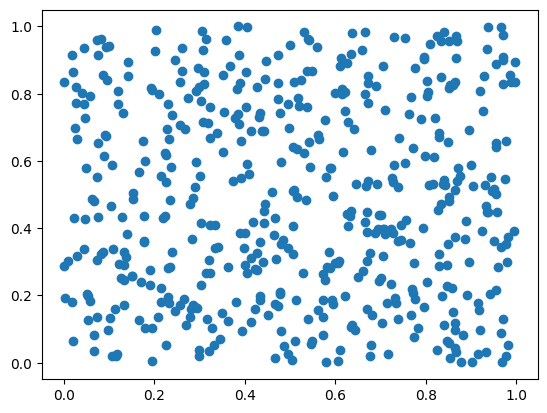

In [33]:
plt.scatter(x[:,0],x[:,1])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss=list()
for k in range(1,11):
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train)
    wcss.append(model.inertia_)

In [38]:
wcss

[68.07931134062956,
 43.21878366572193,
 27.024778356466364,
 16.40101027995292,
 14.286591361625614,
 11.673930354929642,
 9.996390277385746,
 8.55478219684758,
 7.196333537737304,
 6.543790499651673]

([<matplotlib.axis.XTick at 0x263e43f8a70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

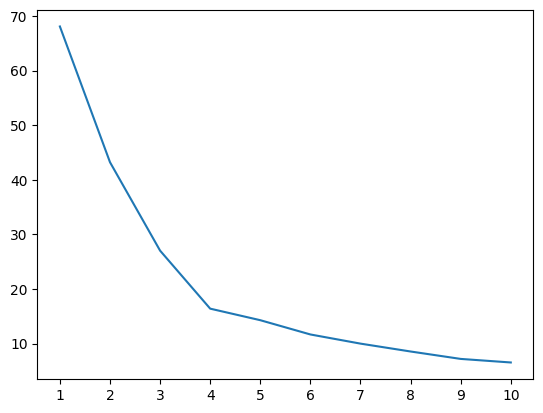

In [39]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [40]:
from kneed import KneeLocator

In [41]:
k1=KneeLocator(x=range(1,11),y=wcss,curve = "convex",direction="decreasing")

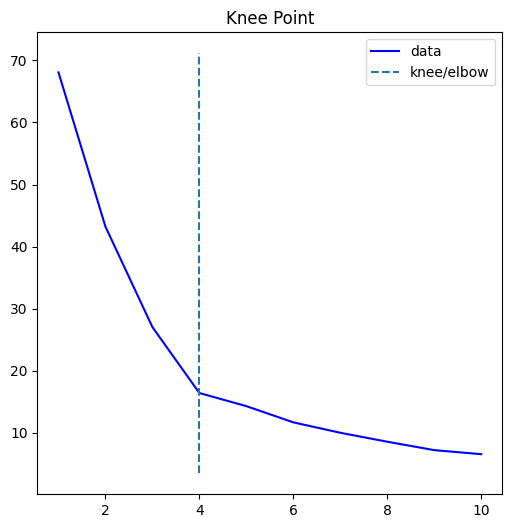

In [42]:
k1.plot_knee()

In [43]:
k1.elbow

4

In [44]:
model=KMeans(n_clusters=4,init='k-means++')
model.fit(X_train)

KMeans(n_clusters=4)

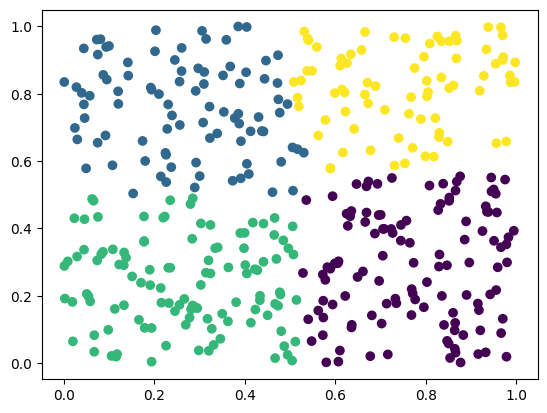

In [45]:
plt.scatter(X_train[:,0],X_train[:,1],c=model.labels_)

In [46]:
from sklearn.metrics import silhouette_score

In [49]:
silhoutte_score=list()
for i in range(2,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(X_train)
    score=silhouette_score(X_train,model.labels_)
    silhoutte_score.append(score)

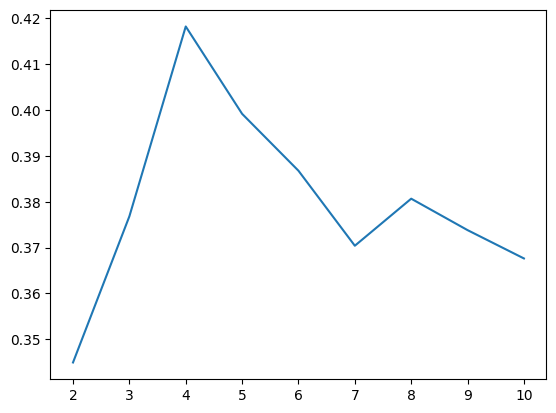

In [50]:
plt.plot(range(2,11),silhoutte_score)

In [52]:
model=KMeans(n_clusters=4,init='k-means++')
model.fit(X_train)

KMeans(n_clusters=4)

In [54]:
y_test_labels=model.predict(X_test)

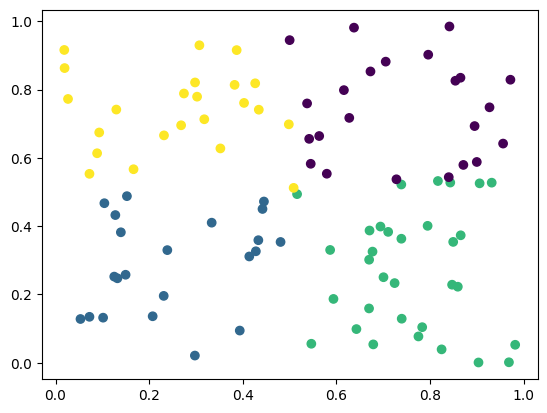

In [55]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

# Hierarchical Clustering

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df=sns.load_dataset("iris")

In [59]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaling=StandardScaler()

In [71]:
scaled_data=scaling.fit_transform(df.iloc[:,:-1])

In [72]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [74]:
scaled_data.shape

(150, 4)

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA(n_components=2)

In [80]:
pca_Scaled=pca.fit_transform(scaled_data)

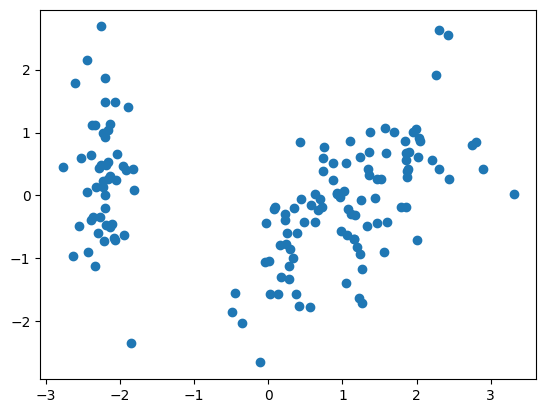

In [81]:
plt.scatter(pca_Scaled[:,0],pca_Scaled[:,1])

In [84]:
import scipy.cluster.hierarchy as sc

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [102.5, 102.5, 146.25, 146.25],
  [54.375, 54.375, 124.375, 124.375],
  [22.5, 22.5, 89.375, 89.375],
  [5.0, 5.0, 55.9375, 55.9375],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [312.5, 31

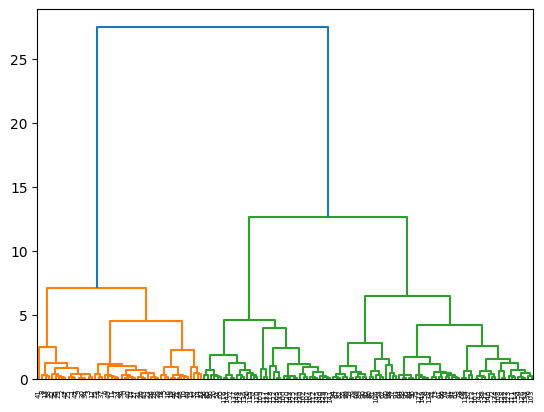

In [87]:
sc.dendrogram(sc.linkage(pca_Scaled,method="ward"))

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
model=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")
model.fit(pca_Scaled)

AgglomerativeClustering()

In [96]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

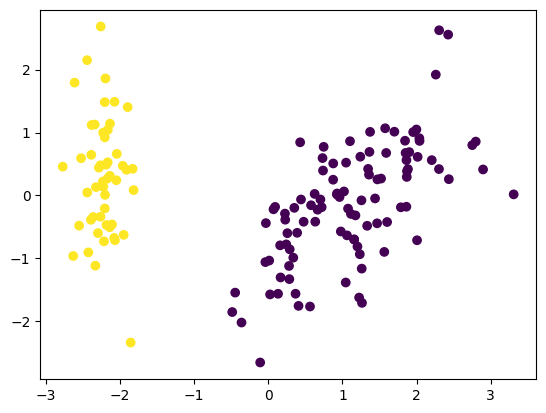

In [97]:
plt.scatter(pca_Scaled[:,0],pca_Scaled[:,1],c=model.labels_)

In [100]:
silhoute_score=list()
for i in range(2,11):
    model=AgglomerativeClustering(n_clusters=i,metric="euclidean",linkage="ward")
    model.fit(pca_Scaled)
    score=silhouette_score(pca_Scaled,model.labels_)
    silhoute_score.append(score)


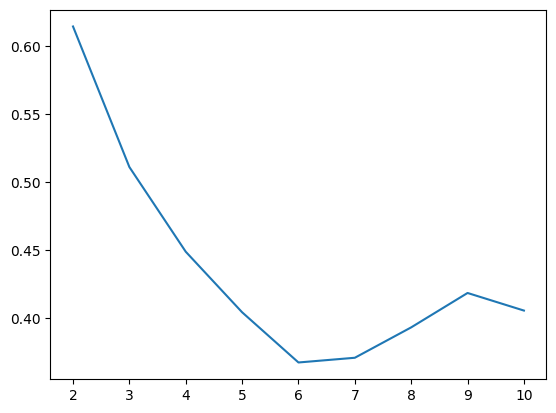

In [101]:
plt.plot(range(2,11),silhoute_score)

# DB Scan Clustering

In [103]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
x,y=make_moons(n_samples=200,noise=0.05)

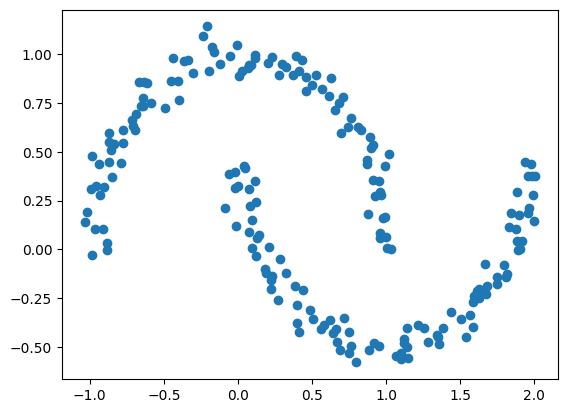

In [139]:
plt.scatter(x[:,0],x[:,1])

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [141]:
scaling=StandardScaler()

In [142]:
scaled_x=scaling.fit_transform(x)

In [143]:
model=DBSCAN(eps=0.5)

In [144]:
model.fit(scaled_x)

DBSCAN()

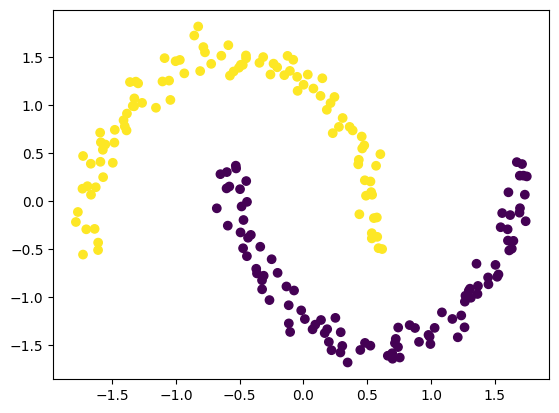

In [146]:
plt.scatter(scaled_x[:,0],scaled_x[:,1],c=model.labels_)